In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [5]:
df= pd.read_csv('supermarket.csv')

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.shape

(9800, 18)

# Data Cleaning

In [11]:
df.isnull().sum()/df.shape[0]*100
df=df.fillna(method="ffill")
df.isnull().sum()/df.shape[0]*100


Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

In [13]:
#Converting order/ship date to date format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      3815 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

#### Contplot

Countplot is used to visualize the count of each unique value present in a column

<Axes: xlabel='Segment', ylabel='count'>

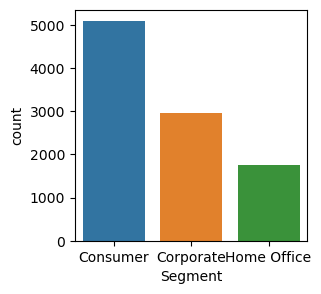

In [17]:
#Applying count plot on segment column
plt.figure(figsize=(3,3))
sns.countplot(x='Segment',data=df)

#### Piechart

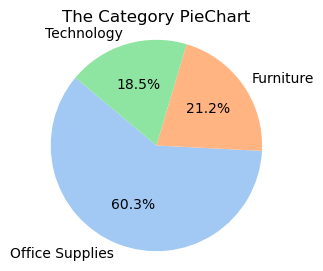

In [19]:
#Applying pie chart on category column
category_counts = df['Category'].value_counts()
# Let's take the category
categories = category_counts.index.tolist() 
# Let's take the count values of each category
counts = category_counts.values.tolist()

colors = sns.color_palette('pastel')[0:4]  # Using Seaborn's pastel color palette

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The Category PieChart')

# Show the plot
plt.show()


### Analysis on numerical data

##### Using hue parameter

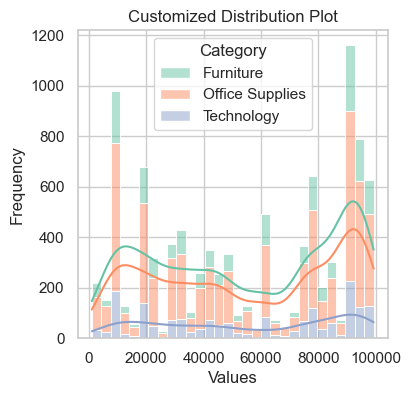

In [23]:
# Plotting a customized distplot on postal code and category column using Seaborn
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")  # Setting Seaborn style

# Creating the distplot
sns.histplot(data=df, x='Postal Code', kde=True, hue='Category', palette='Set2', multiple='stack', bins=30)
plt.title('Customized Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()


##### Plotting boxplot for multiple numrical column 

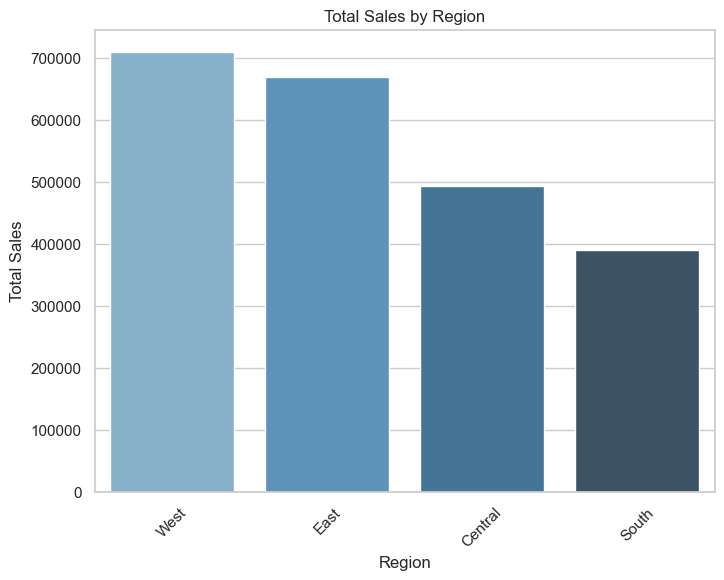

In [31]:

# Group by 'Region' and calculate the total 'Sales' per region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort values by total sales (optional)
region_sales = region_sales.sort_values(by='Sales', ascending=False)

# Plot the total sales by region
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='Blues_d')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()


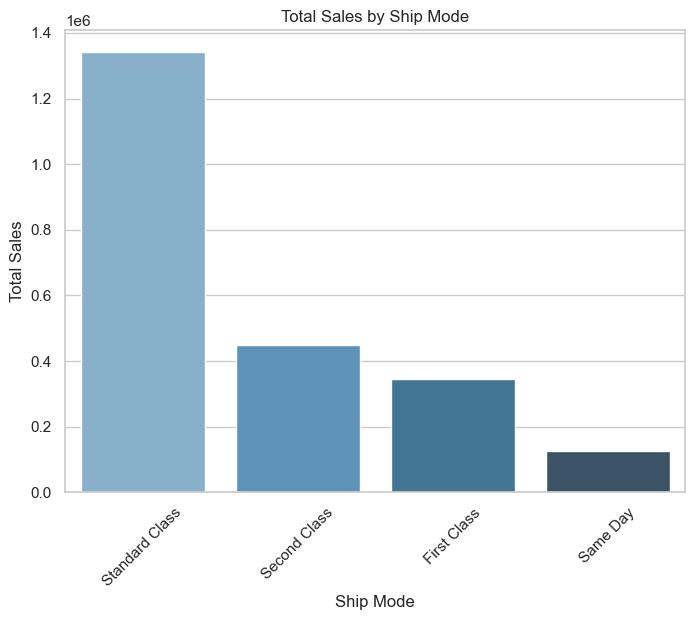

In [33]:
# Group by 'Ship Mode' and calculate the total 'Sales' per ship mode
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Sort values by total sales (optional)
shipmode_sales = shipmode_sales.sort_values(by='Sales', ascending=False)

# Plot the total sales by ship mode
plt.figure(figsize=(8,6))
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales, palette='Blues_d')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()


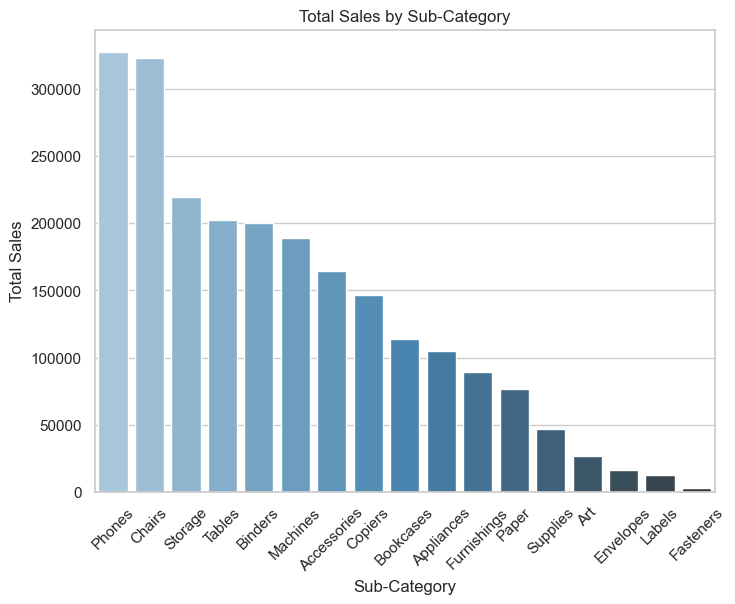

In [37]:
# Group by 'Ship Mode' and calculate the total 'Sales' per ship mode
shipmode_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort values by total sales (optional)
shipmode_sales = shipmode_sales.sort_values(by='Sales', ascending=False)

# Plot the total sales by ship mode
plt.figure(figsize=(8,6))
sns.barplot(x='Sub-Category', y='Sales', data=shipmode_sales, palette='Blues_d')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()


#### Lineplot

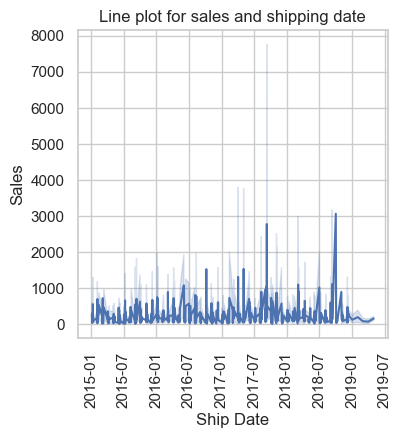

In [39]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=df, x='Ship Date', y='Sales')
sns.set(style="darkgrid")
plt.title('Line plot for sales and shipping date')
plt.xticks(rotation=90) 
plt.show()


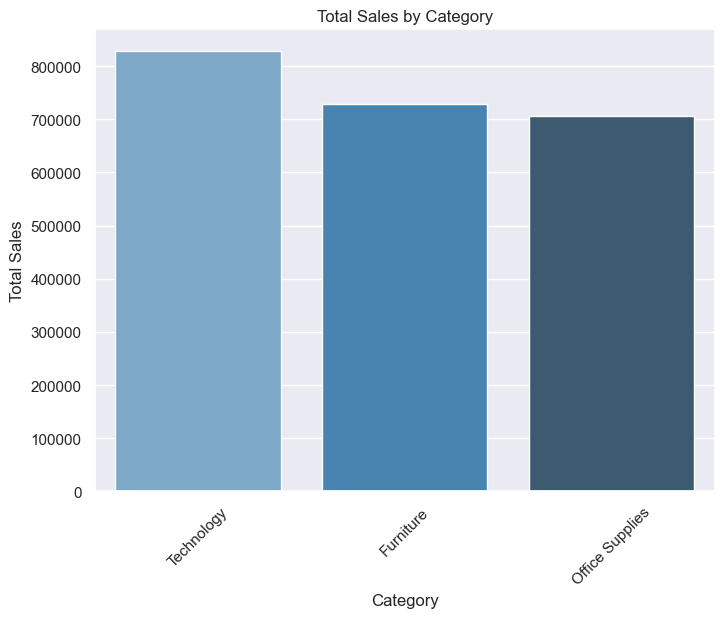

In [43]:
# Group by 'Segment' and calculate the total 'Sales' per segment
shipmode_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort values by total sales (optional)
shipmode_sales = shipmode_sales.sort_values(by='Sales', ascending=False)

# Plot the total sales by segment
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Sales', data=shipmode_sales, palette='Blues_d')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()


#### Lineplot using hue parameter

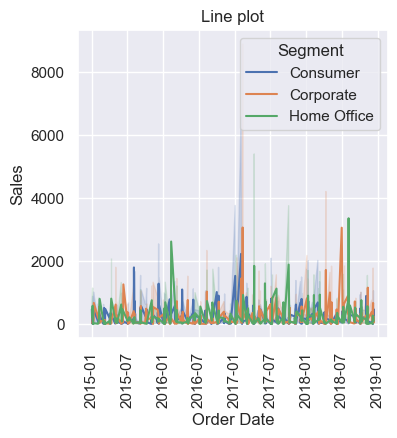

In [45]:
plt.figure(figsize=(4, 4))
sns.lineplot(x="Order Date",y="Sales",data=df,hue="Segment")
sns.set(style="darkgrid")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()

### Numerical- Categorical

#### Barplot

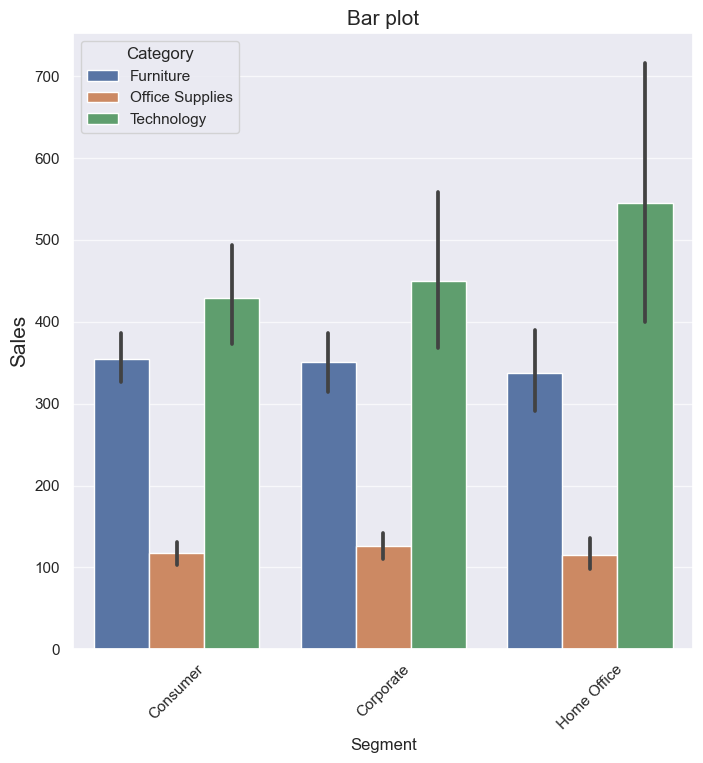

In [47]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Segment",y="Sales",data=df,hue="Category")
plt.title("Bar plot",fontsize=15)
plt.xlabel("Segment",fontsize=12)
plt.ylabel("Sales",fontsize=15)
ax = plt.gca()
ax.grid(True, axis='y', linestyle='-', alpha=0.7) 
plt.xticks(rotation=45) 
plt.show()

#### Distplot

### Categorical - Categorical

#### Heatmap

<Axes: xlabel='Ship Mode', ylabel='Category'>

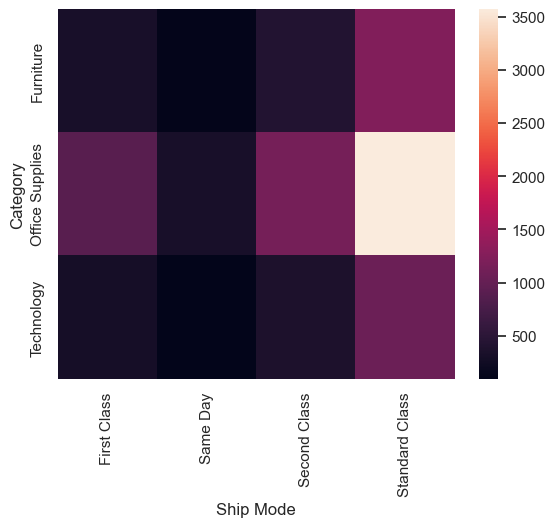

In [49]:
sns.heatmap(pd.crosstab(df['Category'],df['Ship Mode']))

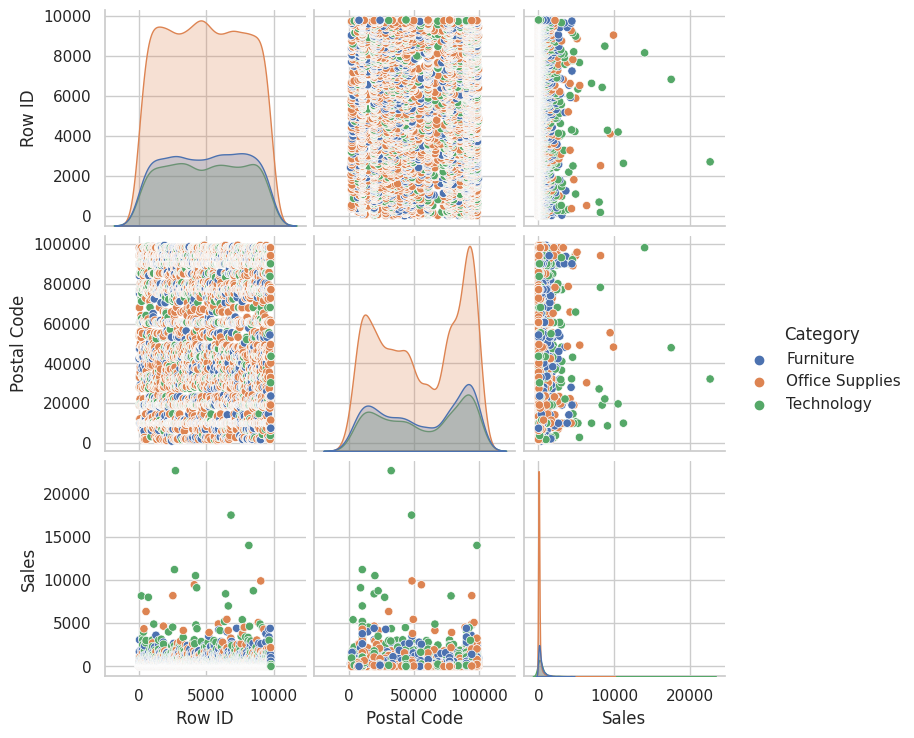

In [54]:
sns.pairplot(df,hue='Category')

# Plot using aggregate function

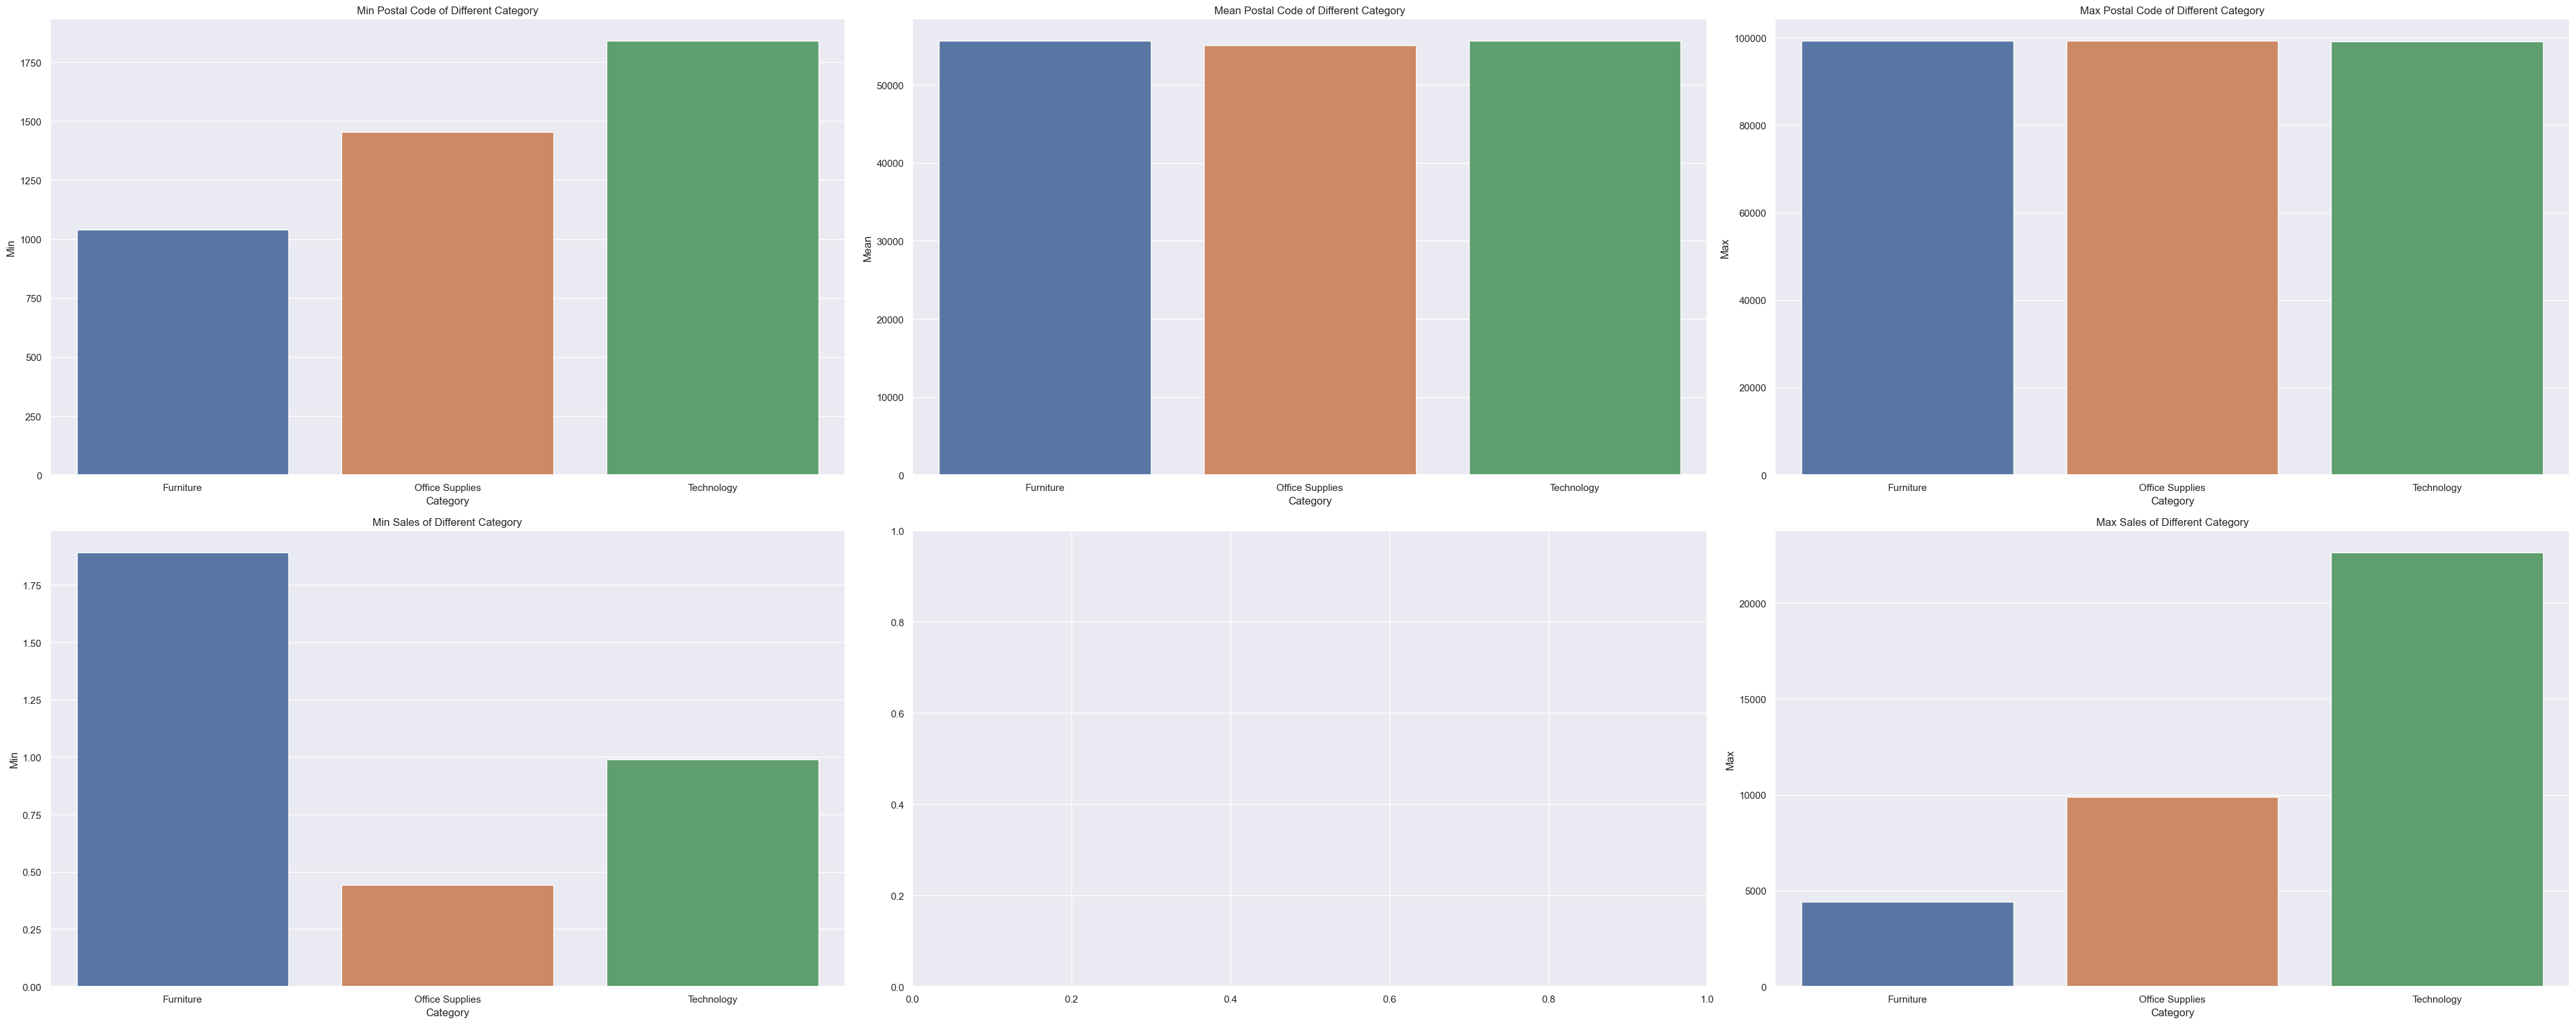

In [63]:
result1 = df.groupby('Category')['Postal Code'].agg(['mean', 'max', 'min']).reset_index()
result2 = df.groupby('Category')['Sales'].agg(['mean', 'max', 'min']).reset_index()

fig, axes = plt.subplots(2, 3, figsize=(40, 16))

sns.barplot(ax=axes[0, 0],data=result1, x='Category', y='min')
axes[0, 0].set_title('Min Postal Code of Different Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Min')


sns.barplot(ax=axes[0, 1],data=result1, x='Category', y='mean')
axes[0, 1].set_title('Mean Postal Code of Different Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Mean')

sns.barplot(ax=axes[0, 2],data=result1, x='Category', y='max')
axes[0, 2].set_title('Max Postal Code of Different Category')
axes[0, 2].set_xlabel('Category')
axes[0, 2].set_ylabel('Max')

sns.barplot(ax=axes[1, 0],data=result2, x='Category', y='min')
axes[1, 0].set_title('Min Sales of Different Category')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Min')



sns.barplot(ax=axes[1, 2],data=result2, x='Category', y='max')
axes[1, 2].set_title('Max Sales of Different Category')
axes[1, 2].set_xlabel('Category')
axes[1, 2].set_ylabel('Max')

plt.tight_layout()
plt.show()


# Plotting using groupby

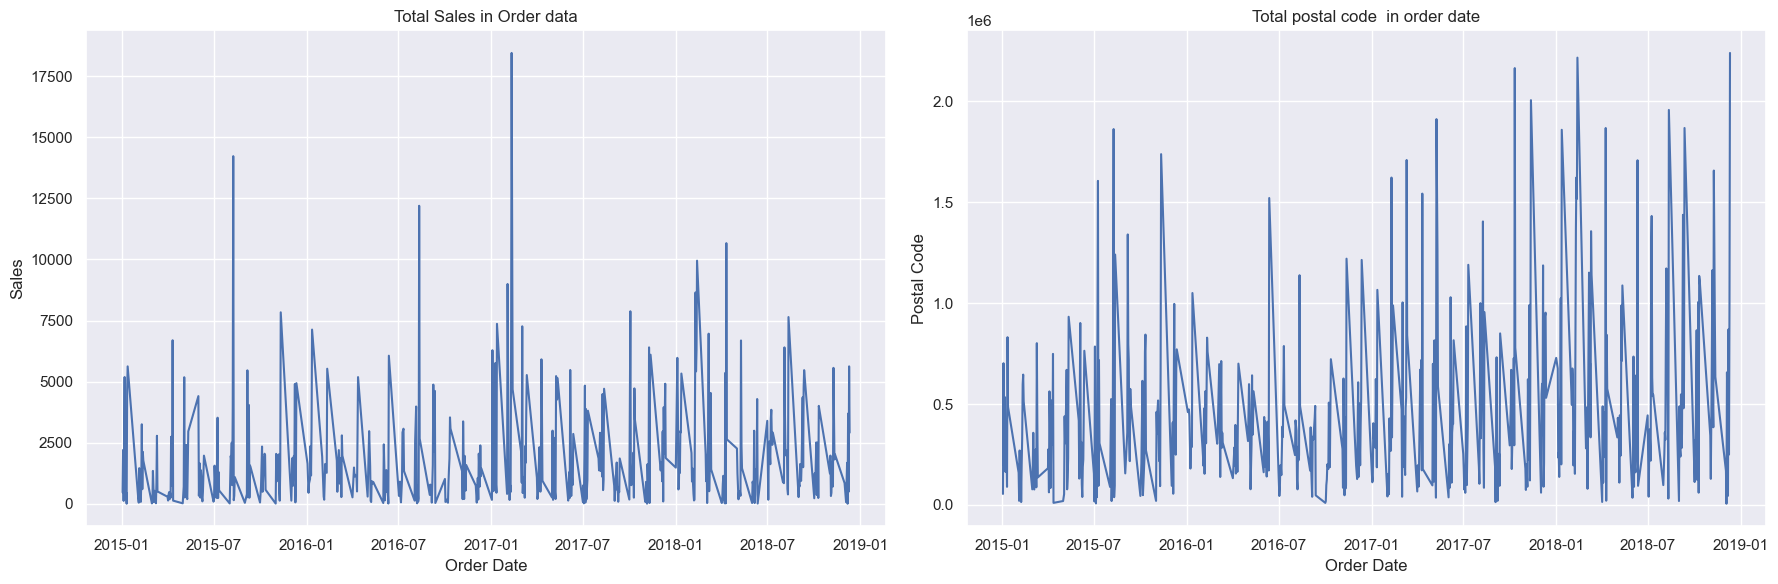

In [65]:
g1 =df.groupby(['Order Date'])['Sales'].sum().reset_index()
g1=g1.sort_index(ascending=False)

g2 =df.groupby(['Order Date'])['Postal Code'].sum().reset_index()
g2=g2.sort_index(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Here 3 means row and 2 means column


sns.lineplot(ax=axes[0],data=g1, x='Order Date', y='Sales')
axes[0].set_title('Total Sales in Order data')


sns.lineplot(ax=axes[1],data=g2, x='Order Date', y='Postal Code')
axes[1].set_title('Total postal code  in order date')


plt.tight_layout()
plt.show()
                 
                 
                